In [38]:
pip install librosa ipython scipy


Note: you may need to restart the kernel to use updated packages.


In [40]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display as dsp
import numpy as np
import scipy
import scipy.fft

Untuk menganalisis frekuensi dasar (F0) dalam kode tersebut 
digunakan fungsi librosa.pyin. Berikut penjelasan cara kerja analisis F0:


1. Pengenalan Frekuensi Dasar (F0)
Frekuensi dasar (F0):
Adalah frekuensi terendah yang dihasilkan oleh suatu sumber suara, sering dikaitkan dengan pitch atau nada dasar dalam sinyal audio.
Metode Probabilistic YIN (pYIN):
librosa.pyin adalah implementasi probabilistik dari algoritma YIN, yang dirancang untuk mendeteksi pitch dengan akurasi tinggi dan memperhitungkan ketidakpastian.

2. Cara Kerja librosa.pyin
Fungsi ini bekerja melalui langkah-langkah berikut:

Input Audio:

Memasukkan sinyal audio mentah (x) dan parameter seperti fmin (frekuensi minimum) dan fmax (frekuensi maksimum).
Parameter ini membatasi rentang frekuensi yang dicari, sehingga mempercepat proses dan meningkatkan akurasi.
Segmentasi Audio:

Audio dibagi menjadi frame-frame kecil menggunakan jendela (windowing). Panjang jendela dan hop-length default didasarkan pada nilai sampling rate (sr).
Estimasi Periodisitas:

Menggunakan algoritma YIN untuk menghitung periodisitas dari setiap frame audio.
Periodisitas adalah kebalikan dari frekuensi dasar (F0 = 1/periode).
Probabilistic Refinement:

Algoritma pYIN mengubah estimasi periodisitas menjadi probabilitas, sehingga memberikan hasil F0 yang lebih halus dan dapat diandalkan.
Probabilitas suara (voiced_probs) digunakan untuk menilai apakah sebuah frame memiliki pitch atau tidak.
Pengambilan Nilai Valid:

F0 yang tidak valid diberi nilai NaN.
Hanya nilai F0 valid (bukan NaN) yang diambil untuk perhitungan lebih lanjut.

Contoh Emosi Netral

In [63]:
import librosa
import IPython.display as ipd

# Load Audio
filename = r"C:\Users\User\Documents\semester 3\pengolaham sinyal digital\UAS\03-01-01-01-01-01-03.wav"

# Memuat audio file
try:
    x, fs = librosa.load(filename, sr=None, mono=True, duration=12)
    # Informasi data audio
    print("x Shape =", x.shape)
    print("Sample rate fs =", fs)
    print("Audio Length in seconds = %d [s]" % (x.shape[0] / fs))
    
    # Memutar audio
    ipd.display(ipd.Audio(x, rate=fs))

except FileNotFoundError:
    print(f"File {filename} tidak ditemukan. Pastikan path sudah benar.")
except ValueError as e:
    print(f"Kesalahan saat memuat file: {e}")
except Exception as e:
    print(f"Kesalahan tak terduga: {e}")

x Shape = (54988,)
Sample rate fs = 16000
Audio Length in seconds = 3 [s]


Menganalisis audio dengan ekstraksi informasi frekuensi dasar (F0),Standar deviasi dari F0, intensitas, dan spektrum STFT

Frekuensi Dasar (Mean F0): 154.85 Hz
Standar Deviasi F0: 64.56 Hz
Durasi Audio: 3.44 detik
Intensitas Rata-rata: -35.33 dB


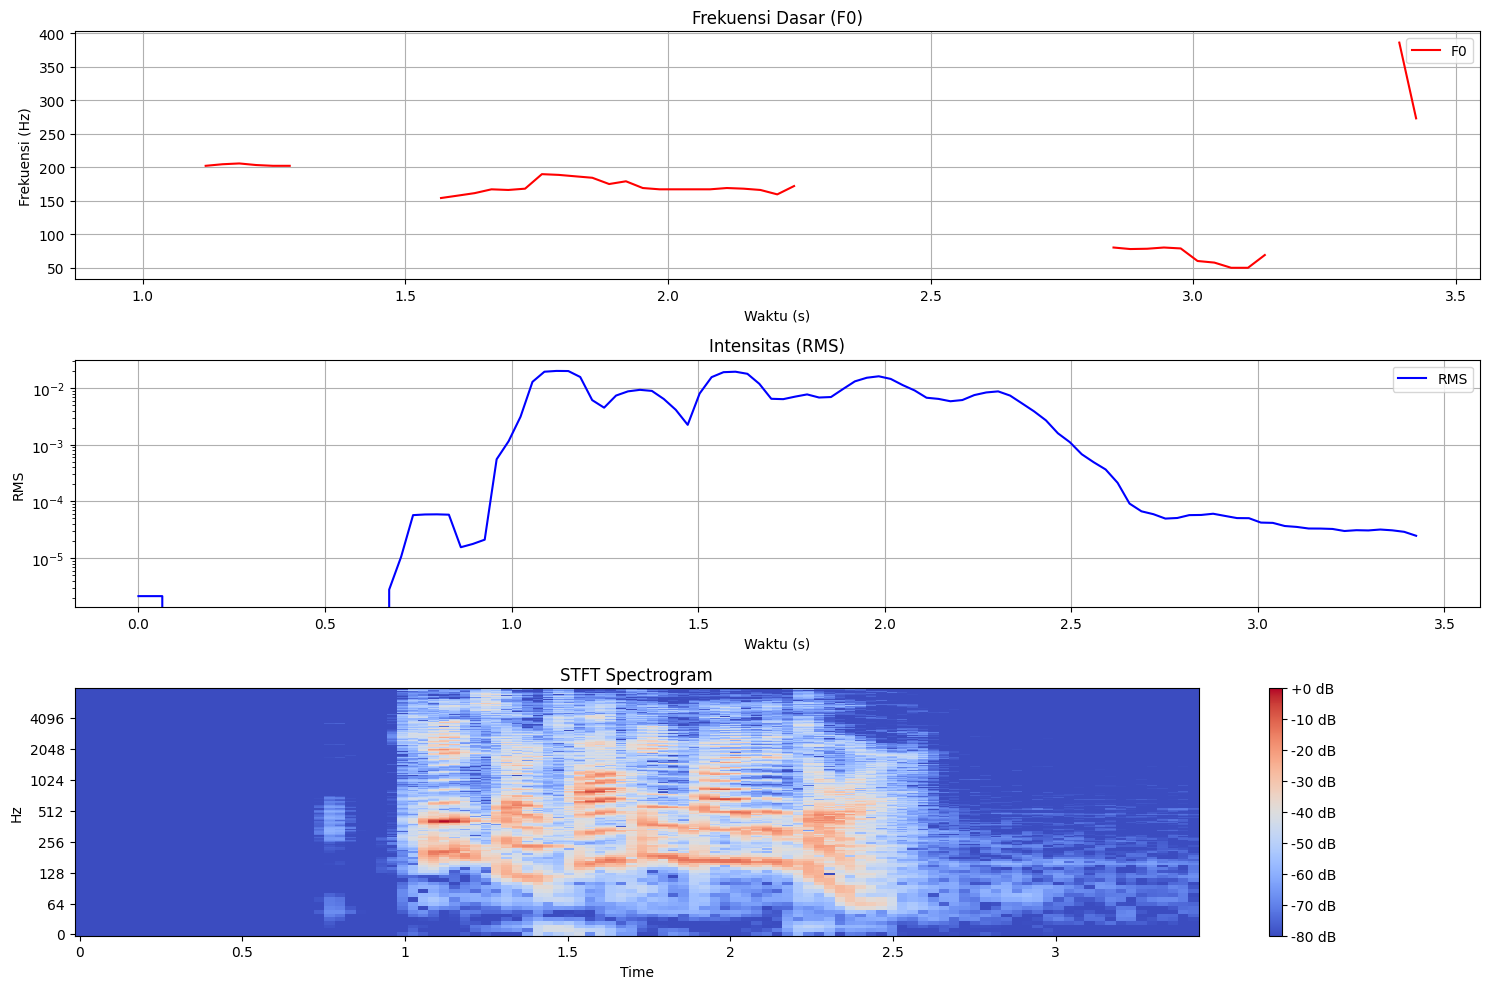

In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio
file_path = '03-01-01-01-01-01-03.wav'  # Ganti dengan path file audio
x, fs = librosa.load(file_path, sr=None)

# Ekstraksi F0 (frekuensi dasar)
f0, voiced_flag, voiced_probs = librosa.pyin(x, fmin=50, fmax=500, sr=fs)
f0_clean = f0[~np.isnan(f0)]  # Hanya mengambil nilai valid (bukan NaN)
f0_mean = np.mean(f0_clean)
f0_std = np.std(f0_clean)

# Hitung RMS (Root Mean Square) dan konversi ke dB
rms = librosa.feature.rms(y=x)
intensity_db = librosa.amplitude_to_db(rms, ref=np.max)

# Durasi audio
duration = librosa.get_duration(y=x, sr=fs)

# Output informasi
print(f"Frekuensi Dasar (Mean F0): {f0_mean:.2f} Hz")
print(f"Standar Deviasi F0: {f0_std:.2f} Hz")
print(f"Durasi Audio: {duration:.2f} detik")
print(f"Intensitas Rata-rata: {np.mean(intensity_db):.2f} dB")

# Visualisasi
plt.figure(figsize=(15, 10))

# Subplot 1: Frekuensi Dasar (F0)
plt.subplot(3, 1, 1)
times = librosa.times_like(f0, sr=fs)
plt.plot(times, f0, label='F0', color='r')
plt.xlabel('Waktu (s)')
plt.ylabel('Frekuensi (Hz)')
plt.title('Frekuensi Dasar (F0)')
plt.legend()
plt.grid()

# Subplot 2: RMS dalam dB
plt.subplot(3, 1, 2)
frames = range(len(rms[0]))
times_rms = librosa.frames_to_time(frames, sr=fs)
plt.semilogy(times_rms, rms[0], label='RMS', color='b')
plt.xlabel('Waktu (s)')
plt.ylabel('RMS')
plt.title('Intensitas (RMS)')
plt.legend()
plt.grid()

# Subplot 3: STFT Spectrogram
plt.subplot(3, 1, 3)
stft_result = librosa.stft(x, n_fft=2048, hop_length=512)
stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)
librosa.display.specshow(stft_db, sr=fs, hop_length=512, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')

plt.tight_layout()
plt.show()


Berdasarkan referensi, audio dengan frekuensi dasar lebih dari 200 dikategorikan sebagai emosi marah sedangkan dibawah 200 dikategorikan emosi tenang (Netral)

In [65]:
# Menentukan emosi berdasarkan nilai Mean F0
if f0_mean < 200:
    emotion = "Emosi Tenang"
else:
    emotion = "Emosi Marah"

# Output hasil analisis emosi
print(f"Berdasarkan nilai Frekuensi Dasar (Mean F0) = {f0_mean:.2f} Hz, suara ini dikategorikan sebagai: {emotion}")


Berdasarkan nilai Frekuensi Dasar (Mean F0) = 154.85 Hz, suara ini dikategorikan sebagai: Emosi Tenang


Contoh Emosi Marah

In [67]:
import librosa
import IPython.display as ipd

# Load Audio
filename = r"C:\Users\User\Documents\semester 3\pengolaham sinyal digital\UAS\03-01-05-02-01-01-03.wav"

# Memuat audio file
try:
    x, fs = librosa.load(filename, sr=None, mono=True, duration=12)
    # Informasi data audio
    print("x Shape =", x.shape)
    print("Sample rate fs =", fs)
    print("Audio Length in seconds = %d [s]" % (x.shape[0] / fs))
    
    # Memutar audio
    ipd.display(ipd.Audio(x, rate=fs))

except FileNotFoundError:
    print(f"File {filename} tidak ditemukan. Pastikan path sudah benar.")
except ValueError as e:
    print(f"Kesalahan saat memuat file: {e}")
except Exception as e:
    print(f"Kesalahan tak terduga: {e}")

x Shape = (70470,)
Sample rate fs = 16000
Audio Length in seconds = 4 [s]


Analisa Audio

Frekuensi Dasar (Mean F0): 296.50 Hz
Standar Deviasi F0: 66.84 Hz
Durasi Audio: 4.40 detik
Intensitas Rata-rata: -27.10 dB


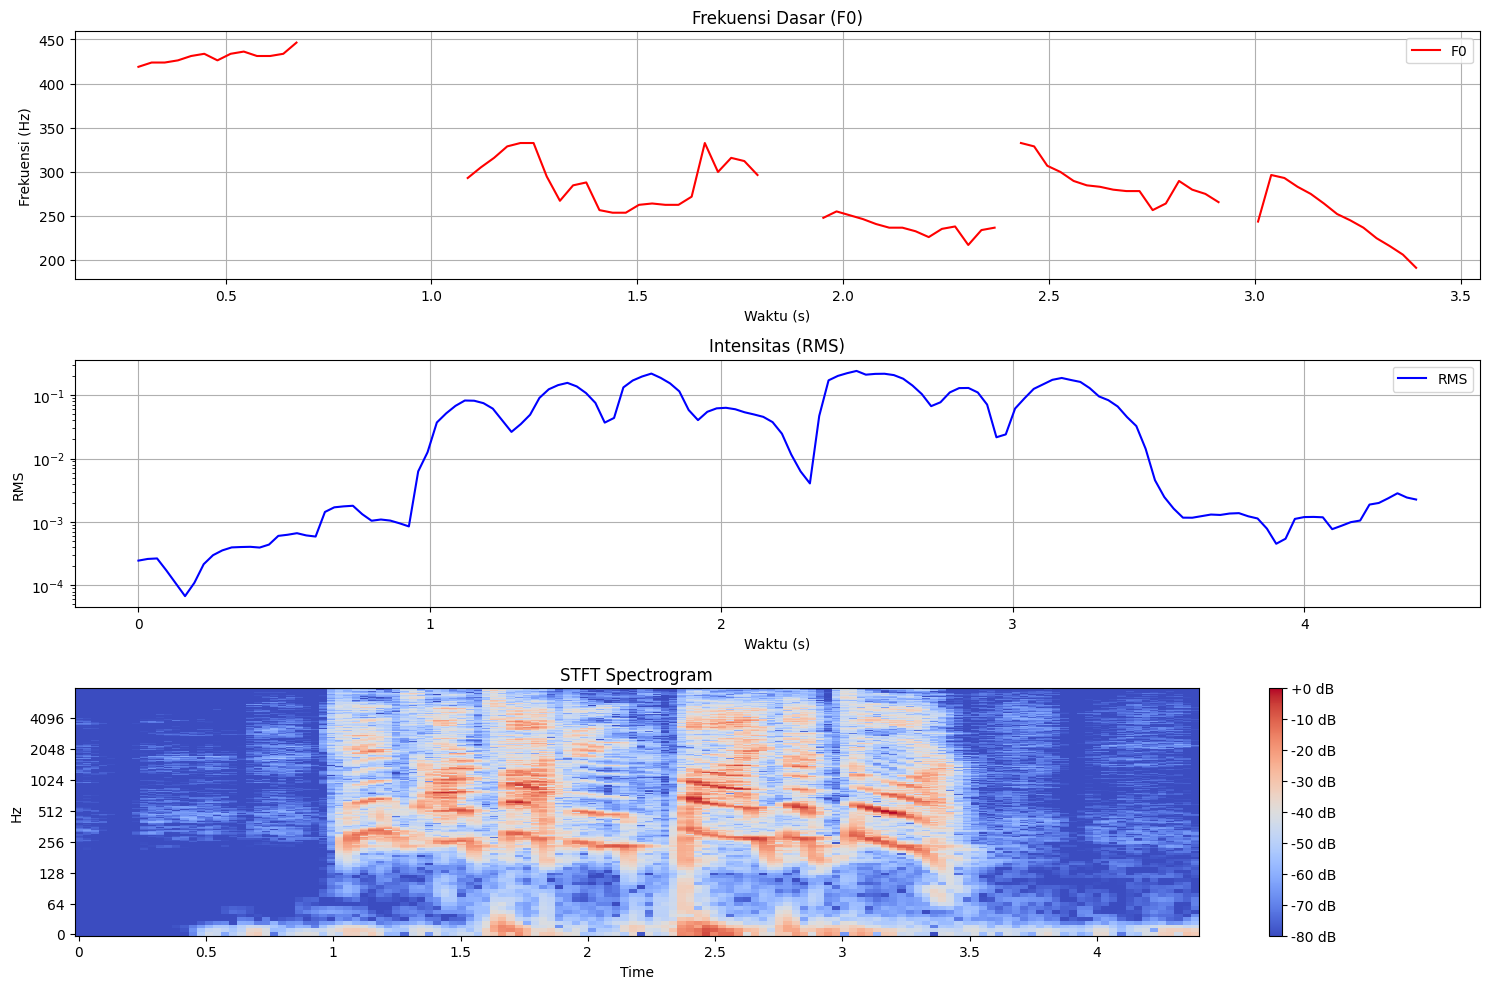

In [68]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio
file_path = '03-01-05-02-01-01-03.wav'  # Ganti dengan path file audio
x, fs = librosa.load(file_path, sr=None)

# Ekstraksi F0 (frekuensi dasar)
f0, voiced_flag, voiced_probs = librosa.pyin(x, fmin=50, fmax=500, sr=fs)
f0_clean = f0[~np.isnan(f0)]  # Hanya mengambil nilai valid (bukan NaN)
f0_mean = np.mean(f0_clean)
f0_std = np.std(f0_clean)

# Hitung RMS (Root Mean Square) dan konversi ke dB
rms = librosa.feature.rms(y=x)
intensity_db = librosa.amplitude_to_db(rms, ref=np.max)

# Durasi audio
duration = librosa.get_duration(y=x, sr=fs)

# Output informasi
print(f"Frekuensi Dasar (Mean F0): {f0_mean:.2f} Hz")
print(f"Standar Deviasi F0: {f0_std:.2f} Hz")
print(f"Durasi Audio: {duration:.2f} detik")
print(f"Intensitas Rata-rata: {np.mean(intensity_db):.2f} dB")

# Visualisasi
plt.figure(figsize=(15, 10))

# Subplot 1: Frekuensi Dasar (F0)
plt.subplot(3, 1, 1)
times = librosa.times_like(f0, sr=fs)
plt.plot(times, f0, label='F0', color='r')
plt.xlabel('Waktu (s)')
plt.ylabel('Frekuensi (Hz)')
plt.title('Frekuensi Dasar (F0)')
plt.legend()
plt.grid()

# Subplot 2: RMS dalam dB
plt.subplot(3, 1, 2)
frames = range(len(rms[0]))
times_rms = librosa.frames_to_time(frames, sr=fs)
plt.semilogy(times_rms, rms[0], label='RMS', color='b')
plt.xlabel('Waktu (s)')
plt.ylabel('RMS')
plt.title('Intensitas (RMS)')
plt.legend()
plt.grid()

# Subplot 3: STFT Spectrogram
plt.subplot(3, 1, 3)
stft_result = librosa.stft(x, n_fft=2048, hop_length=512)
stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)
librosa.display.specshow(stft_db, sr=fs, hop_length=512, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')

plt.tight_layout()
plt.show()


In [69]:
# Menentukan emosi berdasarkan nilai Mean F0
if f0_mean < 200:
    emotion = "Emosi Tenang"
else:
    emotion = "Emosi Marah"

# Output hasil analisis emosi
print(f"Berdasarkan nilai Frekuensi Dasar (Mean F0) = {f0_mean:.2f} Hz, suara ini dikategorikan sebagai: {emotion}")


Berdasarkan nilai Frekuensi Dasar (Mean F0) = 296.50 Hz, suara ini dikategorikan sebagai: Emosi Marah


Merekam selama 3 detik...
Rekaman selesai.
Audio disimpan sebagai user_audio.wav.
Frekuensi Dasar (Mean F0): 161.19 Hz
Standar Deviasi F0: 11.92 Hz
Durasi Audio: 3.00 detik
Intensitas Rata-rata: -27.79 dB


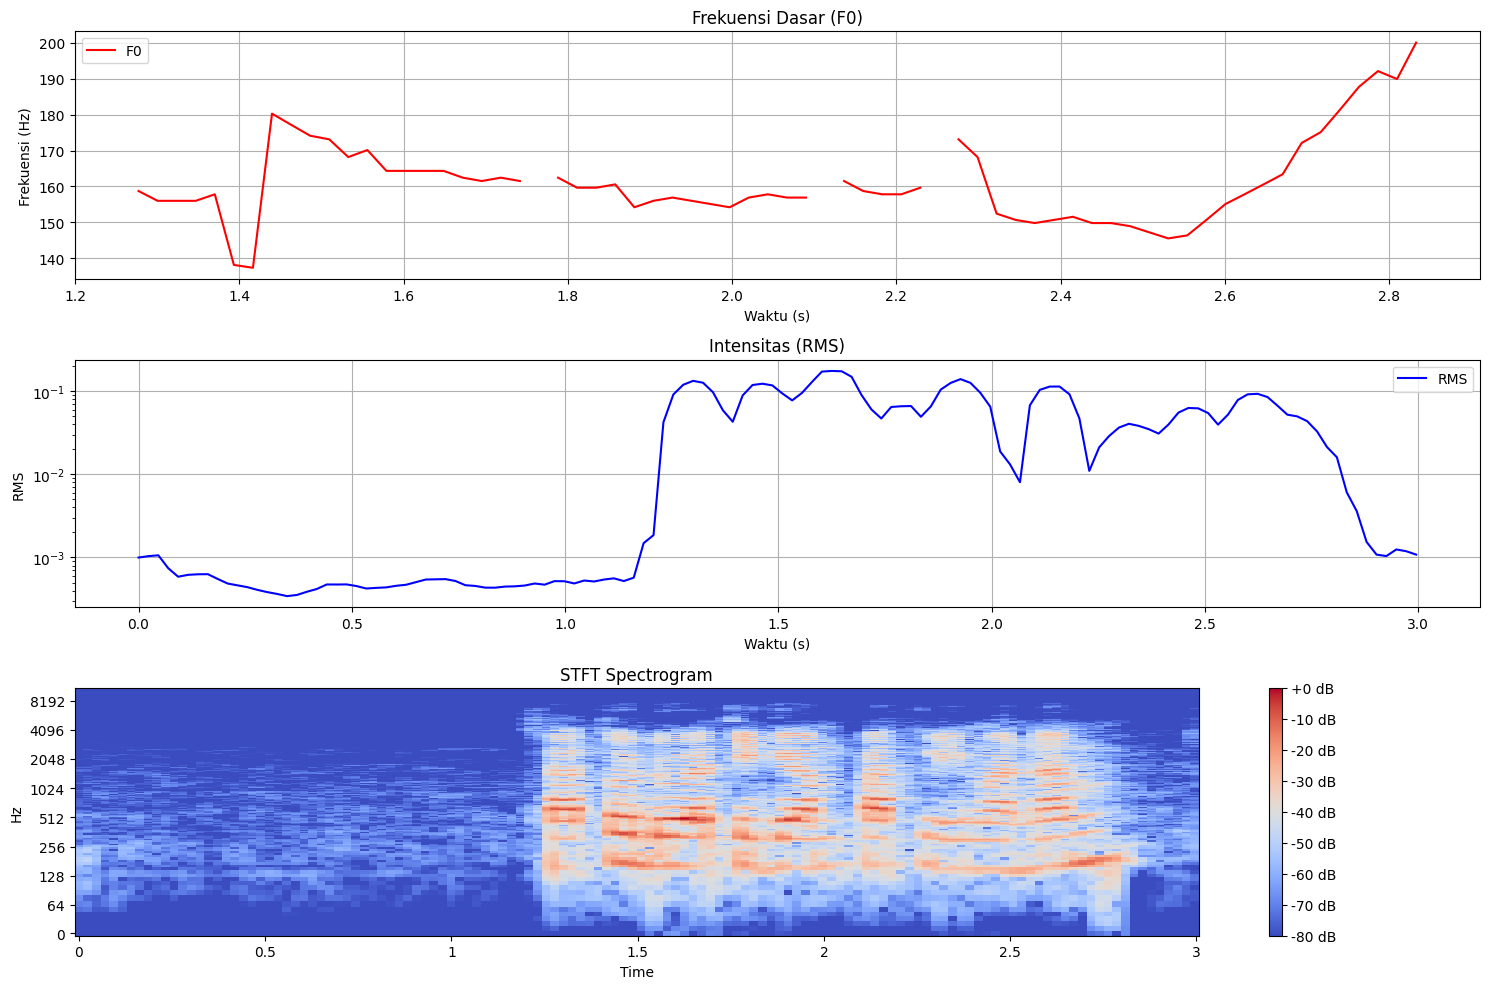

In [7]:
import sounddevice as sd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# Fungsi untuk merekam audio
def record_audio(duration, fs):
    print(f"Merekam selama {duration} detik...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='float32')
    sd.wait()  # Tunggu hingga selesai merekam
    print("Rekaman selesai.")
    return audio.flatten()

# Rekam audio selama 6 detik
fs = 22050  # Sampling rate
duration = 3  # Durasi dalam detik
audio = record_audio(duration, fs)

# Simpan audio ke file .wav
file_name = "user_audio.wav"
write(file_name, fs, (audio * 32767).astype(np.int16))
print(f"Audio disimpan sebagai {file_name}.")

# Load audio menggunakan librosa
x, sr = librosa.load(file_name, sr=None)

# Ekstraksi F0 (frekuensi dasar)
f0, voiced_flag, voiced_probs = librosa.pyin(x, fmin=50, fmax=500, sr=sr)
f0_clean = f0[~np.isnan(f0)]  # Hanya mengambil nilai valid (bukan NaN)
f0_mean = np.mean(f0_clean) if len(f0_clean) > 0 else 0
f0_std = np.std(f0_clean) if len(f0_clean) > 0 else 0

# Hitung RMS (Root Mean Square) dan konversi ke dB
rms = librosa.feature.rms(y=x)
intensity_db = librosa.amplitude_to_db(rms, ref=np.max)

# Durasi audio
duration = librosa.get_duration(y=x, sr=sr)

# Output informasi
print(f"Frekuensi Dasar (Mean F0): {f0_mean:.2f} Hz")
print(f"Standar Deviasi F0: {f0_std:.2f} Hz")
print(f"Durasi Audio: {duration:.2f} detik")
print(f"Intensitas Rata-rata: {np.mean(intensity_db):.2f} dB")

# Visualisasi
plt.figure(figsize=(15, 10))

# Subplot 1: Frekuensi Dasar (F0)
plt.subplot(3, 1, 1)
times = librosa.times_like(f0, sr=sr)
plt.plot(times, f0, label='F0', color='r')
plt.xlabel('Waktu (s)')
plt.ylabel('Frekuensi (Hz)')
plt.title('Frekuensi Dasar (F0)')
plt.legend()
plt.grid()

# Subplot 2: RMS dalam dB
plt.subplot(3, 1, 2)
frames = range(len(rms[0]))
times_rms = librosa.frames_to_time(frames, sr=sr)
plt.semilogy(times_rms, rms[0], label='RMS', color='b')
plt.xlabel('Waktu (s)')
plt.ylabel('RMS')
plt.title('Intensitas (RMS)')
plt.legend()
plt.grid()

# Subplot 3: STFT Spectrogram
plt.subplot(3, 1, 3)
stft_result = librosa.stft(x, n_fft=2048, hop_length=512)
stft_db = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)
librosa.display.specshow(stft_db, sr=sr, hop_length=512, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram')

plt.tight_layout()
plt.show()


In [8]:
# Menentukan emosi berdasarkan nilai Mean F0
if f0_mean <200:
    emotion = "Emosi Tenang"
else:
    emotion = "Emosi Marah"

# Output hasil analisis emosi
print(f"Berdasarkan nilai Frekuensi Dasar (Mean F0) = {f0_mean:.2f} Hz, suara ini dikategorikan sebagai: {emotion}")


Berdasarkan nilai Frekuensi Dasar (Mean F0) = 161.19 Hz, suara ini dikategorikan sebagai: Emosi Tenang
